In [1]:
import malzememodelleri as md

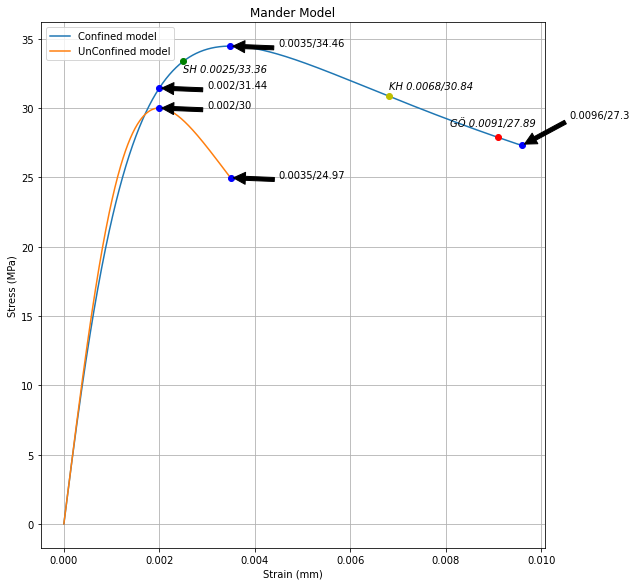

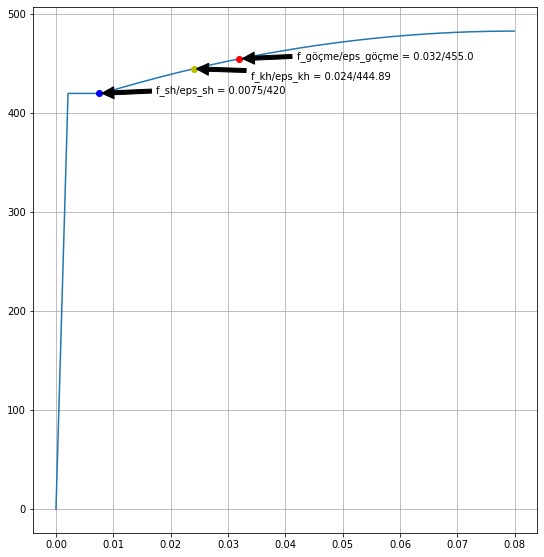

In [2]:
f_ywd = 420
f_co = 30 #MPa
b=300 #mm
h=500 #mm
s=150 #mm
etriye_çapı = 10 #mm
boyuna_donatı_çapı = 20 #mm
pas_payı = 30 #mm
baslık_donatı_top = 4 #adet
baslık_donatı_bot = 4 #adet
gövde_donatı_adeti =1 #adet
x_koladeti = 2 #kesitin x eksenini kesen kol sayısı
y_koladeti = 4 #kesitin y eksenini kesen kol sayısı
x,y=md.tbdy_mander("S420",f_co,b,h,s,etriye_çapı,boyuna_donatı_çapı,pas_payı,
baslık_donatı_top,baslık_donatı_bot,gövde_donatı_adeti,x_koladeti,y_koladeti)
eps,fs = md.celik_modeli("S420")

* As = Boyuna donatı alanı
* ai = Kesit çevresindeki düşey donatıların eksenleri arasındaki uzaklık
* bo = Göbek betonunu sargılayan etriyelerin eksenleri arasında kalan kesit boyutu
* Ec = Betonun elastisite modülü
* Es = Donatı çeliğinin elastisite modülü
* fc = Sargılı betonda beton basınç gerilmesi
* fcc = Sargılı beton dayanımı
* fco = Sargısız betonun basınç dayanımı
* fe = Etkili sargılama basıncı
* fs = Donatı çeliğindeki gerilme
* fsy = Donatı çeliğinin akma dayanımı
* fsu = Donatı çeliğinin kopma dayanımı
* fyw = Enine donatının akma dayanımı
* ho = Göbek betonunu sargılayan etriyelerin eksenleri arasında kalan kesit boyutu
* ke = Sargılama Etkinlik Katsayısı
* s = Enine donatı aralığı
* ρs = Toplam enine donatının hacimsel oranı (dikdörtgen kesitlerde ρs = ρx + ρy )
* ρx , ρy = İlgili doğrultulardaki enine donatı hacim oranı
* εc = Beton basınç birim şekildeğiştirmesi
* εcu = Sargılı betondaki maksimum basınç birim şekildeğiştirmesi
* εsy = Donatı çeliğinin akma birim şekildeğiştirmesi
* εs = Donatı çeliğinin pekleşme başlangıcındaki birim şekildeğiştirmesi
* εsu = Donatı çeliğinin kopma birim şekildeğiştirmesi

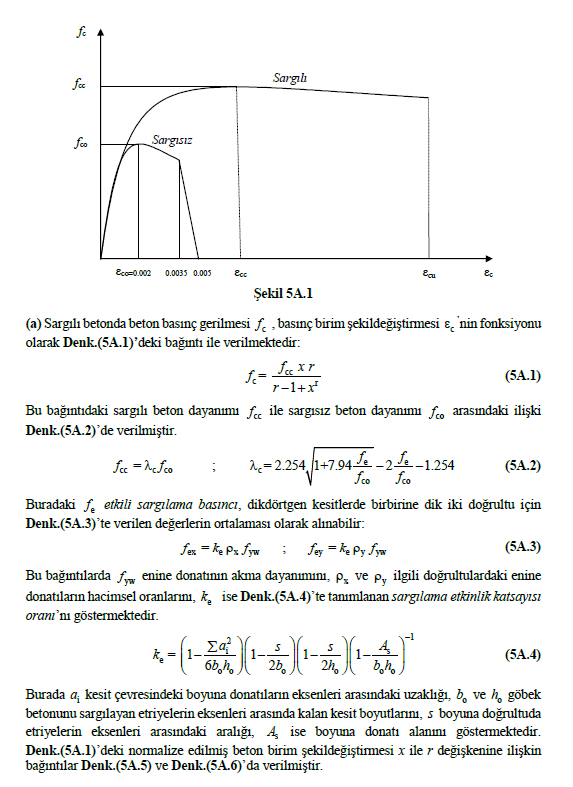    
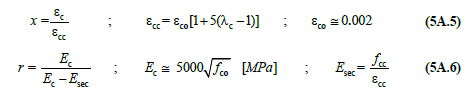
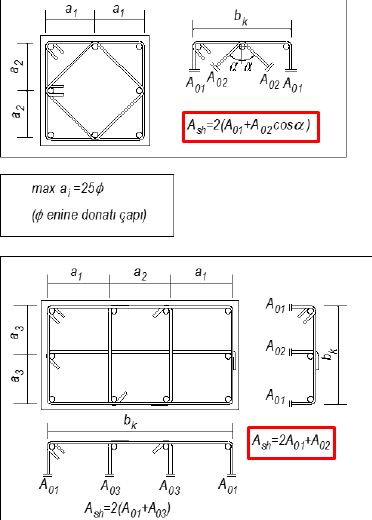

In [3]:
def Cumulative_ai2(Bw : float, H : float, ClearCoverConc : float, TieRebarDiameter : float, LongnitRebarDiameter : float,
              NumBarsBot : int, NumBarsTop : int, NumBarsInterior : int) -> float:
    """_summary_

    Args:
        Bw (float): Kesit genisligi
        H (float): Kesit yuksekligi
        ClearCoverConc (float): Temiz beton ortusu
        TieRebarDiameter (float): Sargi donatisi capi
        LongnitRebarDiameter (float): Boyuna donati capi
        NumBarsBot (int): Kesit altindaki boyuna donati adeti
        NumBarsTop (int): Kesit ustundeki boyuna donati adeti
        NumBarsInterior (int): Kesit ortasindaki boyuna donati adeti

    Returns:
        float: Kumulatif boyuna donati araliklari karesi
    """
    
    a_x = (Bw- 2*ClearCoverConc - 2*TieRebarDiameter - LongnitRebarDiameter)
    a_y = (H - 2*ClearCoverConc - 2*TieRebarDiameter - LongnitRebarDiameter)
    
    birim_x_top = a_x / (NumBarsTop-1)
    birim_x_bot = a_x / (NumBarsBot-1)

    birim_y = a_y / (NumBarsInterior + 1) #birim aralık y

    #ai_x = 2*(baslık_donatı_adeti-1)*birim_x**2
    ai_x_top    = (numBarsTop-1) * birim_x_top**2
    ai_x_bot    = (numBarsBot-1) * birim_x_bot**2
    ai_x_total  = ai_x_top + ai_x_bot
    ai_y        = 2*(NumBarsInterior+1) * birim_y**2

    #toplam_ai2 =ai_x+ai_y
    Cumulative_ai_2 = ai_x_total + ai_y
    return Cumulative_ai_2

def Get_bo(Bw : float, ClearCoverConc : float, TieRebarDiameter : float) -> float:
    """_summary_

    Args:
        Bw (float): Kesit genisligi
        ClearCoverConc (float): Temiz beton ortusu
        TieRebarDiameter (float): Sargi donatisi capi

    Returns:
        float: cekirdek beton bolgesi genisligi
    """
    bo = Bw-(ClearCoverConc + TieRebarDiameter/2) * 2
    return bo

def Get_ho(H : float, ClearCoverConc : float, TieRebarDiameter : float) -> float:
    """_summary_

    Args:
        H (float): Kesit yuksekligi
        ClearCoverConc (float): Temiz beton ortusu
        TieRebarDiameter (float): Sargi donatisi capi

    Returns:
        float: cekirdek beton bolgesi yuksekligi
    """
    ho = H-(ClearCoverConc + TieRebarDiameter/2) * 2
    return ho

def Get_RebarArea(LongnitRebarDiameter : float,NumBarsBot : int, NumBarsTop : int, NumBarsInterior : int) -> float:
    """_summary_

    Args:
        LongnitRebarDiameter (float): Boyuna donati capi
        NumBarsBot (int): Kesit altindaki boyuna donati adeti
        NumBarsTop (int): Kesit ustundeki boyuna donati adeti
        NumBarsInterior (int): Kesit ortasindaki boyuna donati adeti

    Returns:
        float: Boyuna donati alani
    """
    bar_area = 3.14*LongnitRebarDiameter**2/4

    top_bar_area = NumBarsTop * bar_area
    int_bar_area = NumBarsInterior * bar_area
    bot_bar_area = NumBarsBot * bar_area

    A_s = top_bar_area + bot_bar_area + int_bar_area
    
    return A_s

def Get_ke(bo : float, ho : float, Cumulative_ai_2 : float) -> float:
    """_summary_

    Args:
        bo (float): Cekirdek beton bolgesi genisligi
        ho (float): Cekirdek beton bolgesi yuksekligi
        Cumulative_ai_2 (float): Kumulatif boyuna donati araliklari karesi

    Returns:
        float: Sargilama etkinlik katsayisi orani
    """
    
    a = 1-(Cumulative_ai_2/(6*b_0*h_0))
    b = 1-(s/(2*b_0))
    c = 1-(s/(2*h_0))
    d = (1-(A_s/(b_0*h_0)))**-1
    k_e =round((a*b*c*d),3)
    
    return k_e

def Get_TieVolumetricRate(PieceOfTieBarCurrentDirection : int, TieRebarDiameter : float, s : int, CoreConcLengthCurrentDirection) -> float:
    """_summary_

    Args:
        PieceOfTieBarCurrentDirection (int): İlgili dogrultudaki sargi donatisi kol sayisi
        TieRebarDiameter (float): Sargi donatisi capi
        s (int): Enine donati araligi
        CoreConcLengthCurrentDirection (float): İlgili dogrultudaki cekirek beton uzunlugu

    Returns:
        float: Hacimsel sargi donatisi orani
    """
    TieBarArea = 3.14*TieRebarDiameter**2/4
    Ash = (PieceOfTieBarCurrentDirection * TieBarArea)
    ro = round(Ash / (s * CoreConcLengthCurrentDirection),5)
    return ro

def Get_f_e(k_e : float, ro_x : float, ro_y : float, f_sy : float,IsConfined : bool = True) -> float:
    """_summary_

    Args:
        k_e (float): Sargilama etkinlik katsayisi orani
        ro_x (float): X dogrultusundaki hacimsel sargi donatisi orani
        ro_y (float): Y dogrultusundaki hacimsel sargi donatisi orani
        f_sy (float): Donati celiginin akma dayanimi
        IsConfined (bool, optional): Sargili beton mu? Dogru ise True yanlis ise False. Defaults to True.

    Returns:
        float: Etkili sargilama basinci
    """
    f_e = 0.0
    if IsConfined:
        f_ex = round(k_e*ro_x*f_sy,3)
        f_ey = round(k_e*ro_y*f_sy,3)

        f_e=(f_ex+f_ey)/2
    
    return f_e

def Get_Lambda_c(f_e : float, f_co : float) -> float:
    """_summary_

    Args:
        f_e (float): Etkili sargilama basinci
        f_co (float): Sargisiz betonun basinc dayanimi

    Returns:
        float: Sargilama etki katsayisi
    """
    ratio = f_e/f_co
    lamda_c = 2.254 * mt.sqrt(1+7.94*ratio) - (2*ratio) - 1.254
    return lamda_c

def Get_f_cc(lamda_c : float, f_co : float) -> float:
    """_summary_

    Args:
        lamda_c (float): Sargilama etki katsayisi
        f_co (float): Sargisiz betonun basinc dayanimi

    Returns:
        float: Sargili beton dayanimi
    """
    f_cc = lamda_c*f_co
    return f_cc

def Get_eps_cc(lambda_c : float, eps_co : float = 0.002) -> float:
    """_summary_

    Args:
        lambda_c (float): Sargilama etki katsayisi
        eps_co (float, optional): Sargisiz beton basinc dayanimindaki sekil degistirmesi. Defaults to 0.002.

    Returns:
        float: _description_
    """
    eps_cc = eps_co*(1+5*(lamda_c-1))
    return eps_cc

def Get_E_c(f_co : float) -> float:
    """_summary_

    Args:
        f_co (float): Sargisiz betonun basinc dayanimi

    Returns:
        float: Betonun elastisite modülü
    """
    E_c = 5000*mt.sqrt(f_co)
    return E_c

def Get_E_secant(f_cc : float, eps_cc : float) -> float:
    """_summary_

    Args:
        f_cc (float): Sargili beton basinc dayanimi
        eps_cc (float): Sargili beton basinc dayanimindaki birim şekildegistermesi

    Returns:
        float: Sargili beton sekant elastisite modülü
    """
    E_sec = f_cc/eps_cc
    return E_sec

def Get_eps_cu(ro_x : float, ro_y : float, f_sy : float, f_cc : float, eps_su : float) -> float:
    """_summary_

    Args:
        ro_x (float): X dogrultusundaki hacimsel sargi donatisi orani
        ro_y (float): Y dogrultusundaki hacimsel sargi donatisi orani
        f_sy (float): Donati celigi akma dayanimi
        f_cc (float): Sargili beton dayanimi
        eps_su (float): Donati celiginin kopma birim sekildegistirmesi

    Returns:
        float: Sargili betondaki maksimum basinc birim sekildegistirmesi
    """
    eps_cu = 0.004+(1.4*((ro_x+ro_y)/2)*f_sy*eps_su)/f_cc
    return eps_cu

In [4]:
f_ywd = 420
f_co = 30 #MPa
b=300 #mm
h=500 #mm
s=150 #mm
etriye_çapı = 10 #mm
boyuna_donatı_çapı = 20 #mm
pas_payı = 30 #mm
baslık_donatı_top = 4 #adet
baslık_donatı_bot = 4 #adet
gövde_donatı_adeti =1 #adet
x_koladeti = 2 #kesitin x eksenini kesen kol sayısı
y_koladeti = 4 #kesitin y eksenini kesen kol sayısı

In [5]:
#Boyuna donatı alanı hesabı
As = Get_RebarArea(LongnitRebarDiameter = boyuna_donatı_çapı,
                   NumBarsBot = baslık_donatı_bot, 
                   NumBarsTop = baslık_donatı_top, 
                   NumBarsInterior = gövde_donatı_adeti)


#ke değerinin bulunması
bo = Get_bo(Bw = b, 
            ClearCoverConc = pas_payı, 
            TieRebarDiameter =etriye_çapı)
ho = Get_bo(H = h, 
            ClearCoverConc = pas_payı, 
            TieRebarDiameter =etriye_çapı)

Cumulat_ai2 = Cumulative_ai2(Bw =b, 
                             H =h, 
                             ClearCoverConc         = pas_payı, 
                             TieRebarDiameter       = etriye_çapı, 
                             LongnitRebarDiameter   = boyuna_donatı_çapı,
                             NumBarsBot             = baslık_donatı_bot, 
                             NumBarsTop             = baslık_donatı_top, 
                             NumBarsInterior        = gövde_donatı_adeti)

ke = Get_ke(bo =bo, ho =ho, Cumulative_ai_2 =Cumulat_ai2)

#Hacimsel sargı donatı oranları
ro_x = Get_TieVolumetricRate(PieceOfTieBarCurrentDirection = x_koladeti, 
                             TieRebarDiameter = etriye_çapı, 
                             s =s, 
                             CoreConcLengthCurrentDirection = bo)
ro_y = Get_TieVolumetricRate(PieceOfTieBarCurrentDirection = y_koladeti, 
                             TieRebarDiameter = etriye_çapı, 
                             s = s, 
                             CoreConcLengthCurrentDirection = ho)

#f_e değerinin bulunması


2826.0